# Entendimento de Negócio
Este é um dataset disponibilizado pelo Kaggle que contém informações de vendas e produtos de um restaurante. Os dados já se encontram pré-processados e limpos, todavia iremos certificar se ainda falta algo. Nosso objetivo com esse estudo é traçar perfís de clientes por segmentação, e caso fosse um projeto real, gerar insights para o time de negócios e o time de marketing visando uma maior rellação entre Empresa/Cliente.


#### Dicionário de dados

- order_id : um identificador exclusivo para cada pedido.
- date : data da transação.
- item_name : nome do alimento.
- item_type : categoria do item (Fastfood ou Bebidas).
- item_price : preço do item para 1 quantidade.
- quantity : quanta quantidade o cliente pede.
- transaction_amount : o valor total pago pelos clientes.
- transaction_type : método de pagamento (dinheiro, online, outros).
- received_by : gênero da pessoa que processa a transação.
- time_of_sale : diferentes horários do dia (manhã, noite, tarde, noite, meia-noite).

# Entendendo os dados

#### Importando bibliotecas

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [19]:
data =  pd.read_csv(os.getcwd()+'\\data\\raw\\restatorio_de_vendas_restaurante.csv')
data.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [25]:
for col in data:
    print(f'Coluna {col.upper()}:')
    print(data[col].value_counts())
    print('Quantidade de registros:', sum(data[col].value_counts()))
    print(45 * '_')

Coluna ORDER_ID:
order_id
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna DATE:
date
10-11-2022    8
05-09-2022    8
8/31/2022     8
3/19/2023     7
02-03-2023    7
             ..
06-12-2022    1
4/15/2022     1
5/17/2022     1
7/23/2022     1
6/14/2022     1
Name: count, Length: 348, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna ITEM_NAME:
item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna ITEM_TYPE:
item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64
Quantidade de registros: 1000
______________________________

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [8]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [6]:
data.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


#### Observações:
- Na coluna 'transaction_type' apresenda alguns valores NaN, mas temos a informação de que esses valores ausente na verdade são categorizados como outros métodos de pagamento, logo iremos criar um rótulo a eles para preencher esses espaços.
- A quantidade de itens por pedido varia de 1 - 15 unidades.
- O gênero das pessoas estão rotulados como "Mr." e "Mrs."Iremos substituir por "M" para homens e "F" para mulheres, tornando mais simples a identificação.
- Os tipos de dados estão corretos.

In [22]:
# Substituindo valores da coluna 'received_by
data['received_by'] = data['received_by'].str.replace('Mr.', 'M').str.replace('Mrs.','F')

# renomeando a coluna para Gênero
data['received_by'].rename('gender', inplace=True)

0      M
1      M
2      M
3      M
4      M
      ..
995    F
996    M
997    M
998    F
999    F
Name: gender, Length: 1000, dtype: object

In [24]:
# Completando valores nulos na coluna 'transaction_type'
data['transaction_type'] = data['transaction_type'].fillna('Others')

#### Vizualizando a distribuição dos dados

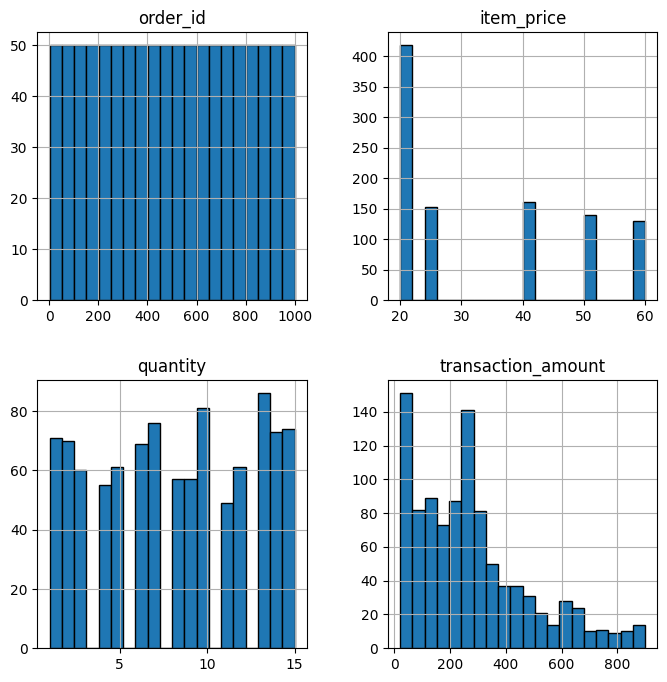

In [30]:
data.hist(figsize=(8,8), bins=20, edgecolor = 'black');

In [41]:
numeric_cols = data[['item_price', 'quantity', 'transaction_amount']]

In [44]:
plt.figure(figsize=(10,10))
for col in range(len(data[numeric_cols])):
    plt.subplot(3,3, 1+col)
    data.iloc[:,col].plot.box()
plt.show()

ValueError: Boolean array expected for the condition, not int64

<Figure size 1000x1000 with 0 Axes>